In [10]:
import os
import shutil
import scipy
import tensorflow as tf  
from tensorflow.keras import optimizers  
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [11]:
#调用数据集
base_dir = 'E:/prgm/tensorflow/kaggle_dogs_cats/small'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [12]:
#定义模型
conv_base = VGG16(weights='imagenet',
                  include_top=False, #选择不包含顶层  
                  input_shape=(150,150, 3))

model = tf.keras.Sequential()
model.add(conv_base) 
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
conv_base.trainable = False#不改变特征

In [14]:
#图像预处理到150*150
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
      directory=train_dir,
      target_size=(150, 150),
      batch_size=20,  
      class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
      directory=validation_dir,
      target_size=(150, 150),   
      batch_size=20,        
      class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
#编译模型
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc']
             )

In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=20,validation_data=validation_generator,
      verbose=1)

Epoch 1/20
50/50 [==============================] - 47s 947ms/step - loss: 0.4055 - acc: 0.8170 - val_loss: 0.3075 - val_acc: 0.8780
Epoch 2/20
50/50 [==============================] - 48s 977ms/step - loss: 0.4117 - acc: 0.8210 - val_loss: 0.3056 - val_acc: 0.8810
Epoch 3/20
50/50 [==============================] - 48s 968ms/step - loss: 0.4018 - acc: 0.8070 - val_loss: 0.3054 - val_acc: 0.8730
Epoch 4/20
50/50 [==============================] - 49s 986ms/step - loss: 0.4135 - acc: 0.8320 - val_loss: 0.3003 - val_acc: 0.8790
Epoch 5/20
50/50 [==============================] - 48s 963ms/step - loss: 0.3856 - acc: 0.8370 - val_loss: 0.2979 - val_acc: 0.8810
Epoch 6/20
50/50 [==============================] - 48s 969ms/step - loss: 0.3807 - acc: 0.8290 - val_loss: 0.2958 - val_acc: 0.8820
Epoch 7/20
50/50 [==============================] - 48s 975ms/step - loss: 0.4008 - acc: 0.8160 - val_loss: 0.2945 - val_acc: 0.8800
Epoch 8/20
50/50 [==============================] - 48s 969ms/step - 

In [19]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

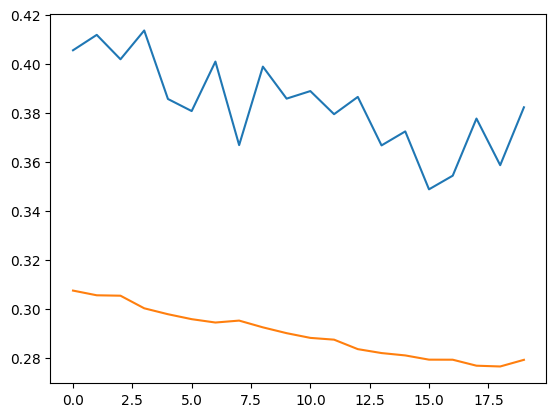

In [22]:
plt.plot(history.epoch,history.history.get('loss'))
plt.plot(history.epoch,history.history.get('val_loss') ,label='val_loss')

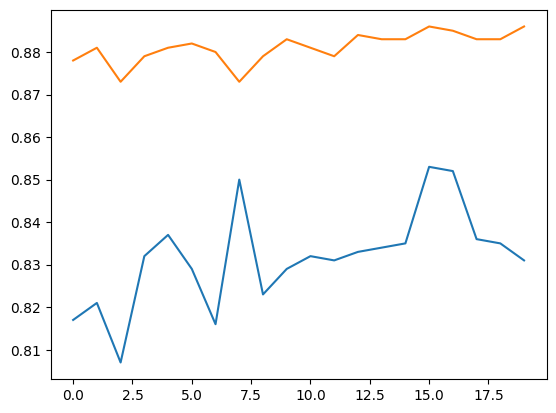

In [23]:
plt.plot(history.epoch,history.history.get('acc') ,label='acc')
plt.plot(history.epoch,history.history.get('val_acc') ,label='val_acc')

In [21]:
#model.save('cats_and_dogs_small_cov.h5')